# CMPE490 - Text to 3D animation using available technology and services

## Existing Service Pipeline for Better Understanding the existing technologies and needs

### Text to Viseme

#### Amazon Polly (Requires AWS to be already configured.)

In [ ]:
# Install boto3, a Python library for AWS, if it is not already installed
!pip install boto3


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


Small test to check if Polly works, with mp3 output

In [ ]:
import boto3
import os

# Initialize Polly client
polly = boto3.client('polly')

# Text to synthesize
text = "Hello, this is a test of Amazon Polly's speech output by Batuhan Yildiz.!"

# Request speech synthesis
response = polly.synthesize_speech(
    Text=text,
    OutputFormat='mp3',
    VoiceId='Joanna'  # Change to other voices like 'Matthew', 'Brian', etc.
)

# Save the audio file
audio_file = os.path.join("src", "speech.mp3")
with open(audio_file, "wb") as file:
    file.write(response['AudioStream'].read())

print(f"Speech saved as {audio_file}")

Speech saved as speech.mp3


In [ ]:
from IPython.display import Audio

# Path to the MP3 file
audio_file = os.path.join("src", "speech.mp3")

# Display the audio player
Audio(audio_file)


Check Polly with json output

In [ ]:
import json

# Initialize Polly client
polly = boto3.client('polly')

# The text to synthesize
text = "Hello, this is a test for Amazon Polly's viseme output."

# Request viseme speech marks from Polly
response = polly.synthesize_speech(
    Text=text,
    OutputFormat='json',         # Output as JSON when requesting speech marks
    VoiceId='Joanna',            # Choose the desired voice
    SpeechMarkTypes=['viseme']   # Request only viseme marks; you can also include 'word', 'sentence', etc.
)

# Save the viseme marks to a file
speech_marks_file = os.path.join("src", "viseme_marks.json")
with open(speech_marks_file, "wb") as file:
    file.write(response['AudioStream'].read())

print(f"Viseme speech marks saved as {speech_marks_file}")

# (Optional) Read and print each JSON object from the file
print("\nParsed viseme marks:")
with open(speech_marks_file, "r") as file:
    for line in file:
        try:
            mark = json.loads(line)
            print(mark)
        except json.JSONDecodeError as e:
            print("Error parsing JSON:", e)


Viseme speech marks saved as viseme_marks.json

Parsed viseme marks:
{'time': 6, 'type': 'viseme', 'value': 'k'}
{'time': 49, 'type': 'viseme', 'value': '@'}
{'time': 78, 'type': 'viseme', 'value': 't'}
{'time': 178, 'type': 'viseme', 'value': 'o'}
{'time': 513, 'type': 'viseme', 'value': 'sil'}
{'time': 700, 'type': 'viseme', 'value': 'T'}
{'time': 759, 'type': 'viseme', 'value': 'i'}
{'time': 811, 'type': 'viseme', 'value': 's'}
{'time': 898, 'type': 'viseme', 'value': 'i'}
{'time': 940, 'type': 'viseme', 'value': 's'}
{'time': 1017, 'type': 'viseme', 'value': '@'}
{'time': 1058, 'type': 'viseme', 'value': 't'}
{'time': 1189, 'type': 'viseme', 'value': 'E'}
{'time': 1280, 'type': 'viseme', 'value': 's'}
{'time': 1353, 'type': 'viseme', 'value': 't'}
{'time': 1382, 'type': 'viseme', 'value': 'f'}
{'time': 1421, 'type': 'viseme', 'value': 'O'}
{'time': 1478, 'type': 'viseme', 'value': 'r'}
{'time': 1555, 'type': 'viseme', 'value': 'a'}
{'time': 1686, 'type': 'viseme', 'value': 'p'}
{'t

#### General Method to get visemes

In [ ]:
import boto3

def get_viseme(text, service_name="polly", file_name = "untitled"):
    """
    Our general method to get visemes from a text:

    Input:
    text: the text to get visemes from
    servive_name (optional): the name of the service to use (default: polly)
    file_name (optional): the name of the file to save the viseme marks

    Output:
    speech_marks_file: the name of the file saved in the current directory
    """
    if service_name == "polly":
        # Initialize Polly client
        polly = boto3.client('polly')

        # Request viseme speech marks from Polly
        response = polly.synthesize_speech(
            Text=text,
            OutputFormat='json',         # Output as JSON when requesting speech marks
            VoiceId='Joanna',            # Choose the desired voice
            SpeechMarkTypes=['viseme']   # Request only viseme marks; you can also include 'word', 'sentence', etc.
        )

    # Save the viseme marks to a file
    speech_marks_file = f"src/{file_name}.json"
    with open(speech_marks_file, "wb") as file:
        file.write(response['AudioStream'].read())

    print(f"Viseme speech marks saved as {speech_marks_file}")

    return speech_marks_file

### 3D Model (For now we use external apps to modify our models to suit them for animation)

### Animation using Visemes

In [ ]:
# ===== Cell 1: Mapping between Amazon Polly visemes and VRoid shape keys =====

polly_to_vroid_mapping = {
    "a": "A",    # open mouth (Ah)
    "@": "A",    # alternate open mouth
    "A": "A",
    "i": "I",    # wide smile (EE)
    "I": "I",
    "u": "U",    # closed lips (U)
    "U": "U",
    "e": "E",    # slight smile (E)
    "E": "E",
    "o": "O",    # rounded (O)
    "O": "O",
    # For consonants, map them to a suitable viseme; here we use I for many
    "t": "I",
    "d": "I",
    "s": "I",
    "z": "I",
    "T": "I",
    "n": "I",
    "l": "I",
    # Map some back-of-mouth sounds to "A" (or adjust as needed)
    "k": "A",
    "g": "A",
    "x": "A",
    # "sil" means silence; reset visemes (None used for no active shape key)
    "sil": None
}

print("Polly to VRoid viseme mapping loaded:")
print(polly_to_vroid_mapping)


Polly to VRoid viseme mapping loaded:
{'a': 'A', '@': 'A', 'A': 'A', 'i': 'I', 'I': 'I', 'u': 'U', 'U': 'U', 'e': 'E', 'E': 'E', 'o': 'O', 'O': 'O', 't': 'I', 'd': 'I', 's': 'I', 'z': 'I', 'T': 'I', 'n': 'I', 'l': 'I', 'k': 'A', 'g': 'A', 'x': 'A', 'sil': None}


In [ ]:
# ===== Cell 2: Function to Animate Visemes from a JSON File =====

import json
import bpy

def animate_visemes(json_path, fps=24):
    """
    Animate the active VRoid model using viseme data from a JSON file.
    The JSON file is expected to have one JSON record per line.
    """
    # Load viseme data from JSON file (each line is a JSON record)
    with open(json_path, "r") as f:
        visemes = [json.loads(line.strip()) for line in f if line.strip()]

    # Get the active object (the VRoid mesh) and verify it has shape keys
    obj = bpy.context.object
    if not obj or not obj.data.shape_keys:
        raise Exception("No active object with shape keys found. Please ensure your VRoid model is imported.")

    key_blocks = obj.data.shape_keys.key_blocks

    def reset_all_keys(frame):
        """Reset all shape keys to 0 and keyframe them at the given frame."""
        for key in key_blocks:
            key.value = 0
            key.keyframe_insert(data_path="value", frame=frame)

    # Process each viseme entry
    for entry in visemes:
        time_ms = entry["time"]
        polly_value = entry["value"]
        frame = int(time_ms / 1000 * fps)

        reset_all_keys(frame)

        viseme = polly_to_vroid_mapping.get(polly_value)
        if viseme is None:
            # Silence or unmapped viseme: no shape key activated.
            continue

        if viseme in key_blocks:
            key_blocks[viseme].value = 1.0
            key_blocks[viseme].keyframe_insert(data_path="value", frame=frame)
        else:
            print(f"Warning: Viseme '{viseme}' not found in shape keys.")

    print("✅ Viseme animation complete!")


ModuleNotFoundError: No module named 'bpy'

In [ ]:
import bpy
import json

class VRoidVisemeAnimator:
    def __init__(self, model_path, viseme_json_path, output_path, fps=24):
        """
        Initializes the animator with paths:
         - model_path: path to the 3D model (e.g., a .vrm file)
         - viseme_json_path: path to the Amazon Polly viseme JSON file
         - output_path: path to save the resulting Blender file with animations
         - fps: frames per second for timing conversion
        """
        self.model_path = model_path
        self.viseme_json_path = viseme_json_path
        self.output_path = output_path
        self.fps = fps

        # Load the model, animate it, and then save the file.
        self.model = self.load_model(self.model_path)
        self.animate_visemes(self.viseme_json_path)
        self.save_animation(self.output_path)

    def load_model(self, model_path):
        """
        Loads the 3D model into Blender.
        This example assumes you have the VRM importer add-on enabled.
        Adjust the import operator if your model format is different.
        """
        # Import the VRM model.
        # Note: Make sure the VRM importer add-on is installed and enabled.
        bpy.ops.import_scene.vrm(filepath=model_path)

        # After import, assume the imported object becomes the active object.
        obj = bpy.context.object
        print(f"✅ Model loaded from: {model_path}")
        return obj

    def animate_visemes(self, viseme_json_path):
        """
        Animate the loaded model using the viseme JSON file from Amazon Polly.
        """
        # Load viseme data (each line is a JSON record)
        with open(viseme_json_path, "r") as f:
            visemes = [json.loads(line.strip()) for line in f if line.strip()]

        # Get the active object and ensure it has shape keys.
        obj = bpy.context.object
        if not obj or not obj.data.shape_keys:
            raise Exception("No object with shape keys found after loading the model.")
        key_blocks = obj.data.shape_keys.key_blocks

        def reset_all_keys(frame):
            """Reset all shape keys at the given frame."""
            for key in key_blocks:
                key.value = 0
                key.keyframe_insert(data_path="value", frame=frame)

        # Process each viseme entry from the JSON
        for entry in visemes:
            time_ms = entry["time"]
            polly_value = entry["value"]
            frame = int(time_ms / 1000 * self.fps)

            reset_all_keys(frame)
            viseme = polly_to_vroid_mapping.get(polly_value)
            if viseme is None:
                continue
            if viseme in key_blocks:
                key_blocks[viseme].value = 1.0
                key_blocks[viseme].keyframe_insert(data_path="value", frame=frame)
            else:
                print(f"Warning: Viseme '{viseme}' not found in shape keys.")

        print("✅ Animation complete using viseme JSON data.")

    def save_animation(self, output_path):
        """
        Saves the current Blender file (with animation) to the specified output path.
        """
        bpy.ops.wm.save_as_mainfile(filepath=output_path)
        print(f"✅ Animation saved to: {output_path}")

In [ ]:
# ===== Cell 3: Complete Pipeline Class =====

import bpy
import json

class VRoidVisemeAnimator:
    def __init__(self, model_path, viseme_json_path, output_path, fps=24):
        """
        Initializes the animator with file paths:
          - model_path: Path to the 3D model (VRM file)
          - viseme_json_path: Path to the Amazon Polly viseme JSON file
          - output_path: Path to save the resulting Blender file with animations
          - fps: Frames per second for timing conversion
        """
        self.model_path = model_path
        self.viseme_json_path = viseme_json_path
        self.output_path = output_path
        self.fps = fps

        # Execute the pipeline
        self.model = self.load_model(self.model_path)
        self.animate_visemes(self.viseme_json_path)
        self.save_animation(self.output_path)

    def load_model(self, model_path):
        """
        Loads the VRM model into Blender.
        This script is intended to run headless, so it automatically imports the model.
        NOTE: Requires the VRM importer add-on to be installed and enabled.
        """
        # Check for VRM importer operator
        if not hasattr(bpy.ops.import_scene, "vrm"):
            raise Exception("VRM importer add-on not found. Please install and enable it.")

        # Import the VRM model
        bpy.ops.import_scene.vrm(filepath=model_path)

        # Assume the imported model becomes the active object
        obj = bpy.context.object
        print(f"✅ Model loaded from: {model_path}")
        return obj

    def animate_visemes(self, viseme_json_path):
        """
        Animate the loaded model using the viseme JSON file.
        """
        # Load viseme data (each line is a JSON record)
        with open(viseme_json_path, "r") as f:
            visemes = [json.loads(line.strip()) for line in f if line.strip()]

        # Get the active object and verify it has shape keys
        obj = bpy.context.object
        if not obj or not obj.data.shape_keys:
            raise Exception("No object with shape keys found after loading the model.")

        key_blocks = obj.data.shape_keys.key_blocks

        def reset_all_keys(frame):
            """Reset all shape keys at the given frame."""
            for key in key_blocks:
                key.value = 0
                key.keyframe_insert(data_path="value", frame=frame)

        # Process each viseme entry
        for entry in visemes:
            time_ms = entry["time"]
            polly_value = entry["value"]
            frame = int(time_ms / 1000 * self.fps)

            reset_all_keys(frame)
            viseme = polly_to_vroid_mapping.get(polly_value)
            if viseme is None:
                continue
            if viseme in key_blocks:
                key_blocks[viseme].value = 1.0
                key_blocks[viseme].keyframe_insert(data_path="value", frame=frame)
            else:
                print(f"Warning: Viseme '{viseme}' not found in shape keys.")

        print("✅ Animation complete using viseme JSON data.")

    def save_animation(self, output_path):
        """
        Saves the current Blender file (with animation) to the specified output path.
        """
        bpy.ops.wm.save_as_mainfile(filepath=output_path)
        print(f"✅ Animation saved to: {output_path}")

# ===== Example usage =====
# You can uncomment and adjust the paths below, then run this script in Blender's background mode.
#
# animator = VRoidVisemeAnimator(
#     model_path="/absolute/path/to/your/model.vrm",
#     viseme_json_path="/absolute/path/to/your/viseme_marks.json",
#     output_path="/absolute/path/to/your/animated_output.blend",
#     fps=24
# )


AttributeError: Calling operator "bpy.ops.import_scene.vrm" error, could not be found

In [ ]:
import json
import bpy
import os

# Set the path to your viseme_marks.json file
json_path = os.path.join(bpy.path.abspath("//"), "viseme_marks.json")

# Read the JSON lines (each line is a separate JSON object)
with open(json_path, "r") as f:
    lines = [line.strip() for line in f if line.strip()]

viseme_data = [json.loads(line) for line in lines]

# Assume the active object has the shape keys you created.
obj = bpy.context.active_object

# Determine scene FPS
fps = bpy.context.scene.render.fps

for viseme in viseme_data:
    time_ms = viseme["time"]
    viseme_value = viseme["value"]
    # Convert milliseconds to frame number (time in seconds = time_ms/1000)
    frame = int((time_ms / 1000) * fps)

    # Check if the shape key exists
    if obj.data.shape_keys and viseme_value in obj.data.shape_keys.key_blocks:
        shape_key = obj.data.shape_keys.key_blocks[viseme_value]
        # Set the shape key influence to 1 at the desired frame
        shape_key.value = 1.0
        shape_key.keyframe_insert(data_path="value", frame=frame)

        # Optionally, set it back to 0 shortly after (e.g., one frame later)
        shape_key.value = 0.0
        shape_key.keyframe_insert(data_path="value", frame=frame + 1)
    else:
        print(f"Warning: No shape key found for viseme '{viseme_value}'")


In [ ]:
import bpy

bpy.ops.import_scene.vrm(filepath="/Users/batuhan/Documents/tedü/4th year/final/U3DFM/pipeline/src/test_model.vrm")


AttributeError: Calling operator "bpy.ops.import_scene.vrm" error, could not be found

## The Project

Our Project uses any 3D Human Model, and either text or audio input to generate an animated 3D model that's directly exportable to most platforms like Unity.

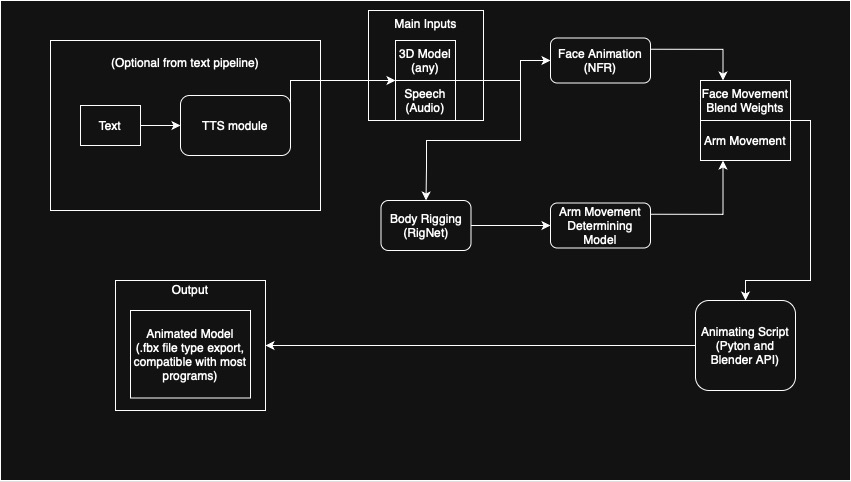

In [4]:
!mamba install pytorch=1.12.1 cudatoolkit=11.3 pytorch-sparse=0.6.15 pytorch3d=0.7.1 cupy=11.3 numpy=1.23.5 -c pytorch -c conda-forge -c pyg -c pytorch3d

zsh:1: command not found: mamba


In [5]:
!pip install allophant torch
!pip install numpy==1.23.5 scipy==1.9.3 --no-cache-dir
!pip install soundfile
!pip install potpourri3d trimesh open3d transforms3d libigl robust_laplacian vedo
!pip install open3d
!git clone https://github.com/dafei-qin/NFR_pytorch.git
!git clone https://github.com/zhan-xu/RigNet.git


  Using cached allophant-1.0.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (14 kB)
  Using cached marshmallow-3.18.0-py3-none-any.whl.metadata (7.5 kB)
  Using cached marshmallow_enum-1.5.1-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached marshmallow_oneofschema-3.0.1-py2.py3-none-any.whl.metadata (5.3 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-macosx_11_0_arm64.whl.metadata (114 kB)
  Using cached transformers-4.41.2-py3-none-any.whl.metadata (43 kB)
  Using cached stanza-1.4.2-py3-none-any.whl.metadata (11 kB)
  Using cached epitran-1.23-py2.py3-none-any.whl.metadata (34 kB)
  Using cached phonemizer-3.2.1-py3-none-any.whl.metadata (7.4 kB)
  Using cached langcodes-3.3.0-py3-none-any.whl.metadata (29 kB)
  Using cached marshmallow_dataclass-8.7.1-py3-none-any.whl.metadata (12 kB)
  Using cached pandas-1.5.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached requests-2.28.1-py3-none-any.whl.metadata 

In [2]:
from allophant.estimator import Estimator

device = "cpu"
model, attribute_indexer = Estimator.restore("kgnlp/allophant", device=device)
supported_features = attribute_indexer.feature_names
# The phonetic feature categories supported by the model, including "phonemes"
print(supported_features)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/allophant/phonetic_features.py:1114: LanguageMappingWarning: Remapped some languages to a variant within the same macro language: {'swa': 'swh', 'est': 'ekk'}
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/allophant/phonetic_features.py:1184: SingletonFeatureWarning: Only one feature variant found in ['tone']
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


['stress', 'syllabic', 'short', 'long', 'consonantal', 'sonorant', 'continuant', 'delayedRelease', 'approximant', 'tap', 'trill', 'nasal', 'lateral', 'labial', 'round', 'labiodental', 'coronal', 'anterior', 'distributed', 'strident', 'dorsal', 'high', 'low', 'front', 'back', 'tense', 'retractedTongueRoot', 'advancedTongueRoot', 'periodicGlottalSource', 'epilaryngealSource', 'spreadGlottis', 'constrictedGlottis', 'fortis', 'raisedLarynxEjective', 'loweredLarynxImplosive', 'click', 'phoneme']


In [1]:
# Cell 2: verify imports
import numpy as np
import scipy
print("numpy:", np.__version__)
print("scipy:", scipy.__version__)

numpy: 1.23.5
scipy: 1.9.3


In [3]:
inventory = attribute_indexer.phoneme_inventory("en")

In [12]:
import torch, torch.nn as nn, torchaudio, pandas as pd, glob, os
from torch.utils.data import Dataset, DataLoader
import trimesh
import subprocess
from allophant.estimator import Estimator
import torchaudio, torch
import subprocess
import sys
import os
import open3d as o3d
import torch
import torchaudio
from allophant.dataset_processing import Batch
import torch
import torchaudio
from allophant.dataset_processing import Batch
from allophant import predictions

### TTS Module

### Arm Movement Determining Model

#### The Model

In [ ]:
class GestureDataset(Dataset):
    def __init__(self, audio_dir, motion_dir, mel_params):
        self.audio_files = sorted(glob.glob(os.path.join(audio_dir, '*.wav')))
        self.csv_files   = sorted(glob.glob(os.path.join(motion_dir, '*.csv')))
        self.mel_spec    = torchaudio.transforms.MelSpectrogram(**mel_params)

    def __len__(self):
        return len(self.audio_files)

    def __getitem__(self, idx):
        wav, sr = torchaudio.load(self.audio_files[idx])
        mel = self.mel_spec(wav).squeeze(0).transpose(0,1)    # (T, C)
        df = pd.read_csv(self.csv_files[idx])
        deltas = torch.tensor(df.iloc[:,1:].values, dtype=torch.float)  # (T,21)
        return mel, deltas

In [ ]:

# Model: audio encoder → temporal model → delta decoder
class Speech2GestureModel(nn.Module):
    def __init__(self, audio_feat_dim=80, enc_channels=[64,128,256],
                 rnn_hidden=128, rnn_layers=2, out_dim=21):
        super().__init__()
        # Audio encoder: stack of 1D convs
        self.audio_encoder = nn.Sequential(
            nn.Conv1d(audio_feat_dim, enc_channels[0], kernel_size=3, padding=1),
            nn.BatchNorm1d(enc_channels[0]),
            nn.ReLU(),
            nn.Conv1d(enc_channels[0], enc_channels[1], kernel_size=3, padding=2, dilation=2),
            nn.BatchNorm1d(enc_channels[1]),
            nn.ReLU(),
            nn.Conv1d(enc_channels[1], enc_channels[2], kernel_size=3, padding=4, dilation=4),
            nn.BatchNorm1d(enc_channels[2]),
            nn.ReLU(),
        )
        # Temporal model: GRU
        self.rnn = nn.GRU(input_size=enc_channels[2], hidden_size=rnn_hidden,
                          num_layers=rnn_layers, batch_first=True)
        # Motion decoder: MLP → 21-deltas
        self.decoder = nn.Sequential(
            nn.Linear(rnn_hidden, 64),
            nn.ReLU(),
            nn.Linear(64, out_dim),
        )

    def forward(self, x):
        # x: (batch, T, F)
        x = x.transpose(1,2)               # (batch, F, T)
        e = self.audio_encoder(x)          # (batch, C, T)
        e = e.transpose(1,2)               # (batch, T, C)
        out, _ = self.rnn(e)               # (batch, T, rnn_hidden)
        y = self.decoder(out)              # (batch, T, out_dim)
        return y

#### Training

In [ ]:
audio_dir  = 'dataset/audio'
motion_dir = 'dataset/motion'
mel_params = {'sample_rate':16000, 'n_mels':80, 'n_fft':400, 'hop_length':533}

dataset = GestureDataset(audio_dir, motion_dir, mel_params)
loader  = DataLoader(dataset, batch_size=8, shuffle=True, drop_last=True)

In [ ]:
model = Speech2GestureModel()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-5)
criterion = nn.MSELoss()
num_epochs = 20

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for mel, deltas in loader:
        optimizer.zero_grad()
        preds = model(mel)
        loss = criterion(preds, deltas)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {total_loss/len(loader):.4f}")

#### Testing/Inference

### Body Rigging Module (RigNet)

In [ ]:
!assimp export model.fbx model.obj

param = model.obj
assimp export: select file format: 'obj' (Wavefront OBJ format)
Launching asset import ...           OK
Validating postprocessing flags ...  OK
0 %
50 %
ERROR: Failed to load file: FBX-DOM unsupported, old format version, supported are only FBX 2011, FBX 2012 and FBX 2013


In [ ]:
# Cell 3: load & inspect the converted mesh
import trimesh
mesh = trimesh.load('model.obj')
print(mesh)

ValueError: string is not a file: `model.obj`

In [ ]:
# Cell 5: run RigNet quick_start & print output
import subprocess, sys

res_rignet = subprocess.run([
    sys.executable, "-u", "RigNet/quick_start.py",
    "--input_folder", ".",
    "--model_id", "model",
    "--mesh", "model.obj"      # use converted .obj
], capture_output=True, text=True)

print("=== RigNet Output ===")
print(res_rignet.stdout)
if res_rignet.stderr:
    print("=== RigNet Errors ===\n", res_rignet.stderr)

### Face Animation Module

#### Audio to Phoneme (Allophant)

In [ ]:
#!/usr/bin/env python3
"""
Callable class for extracting phoneme segments from audio using Allophant.

Example usage in a notebook:

```python
from phoneme_timeline_extractor import PhonemeTimelineExtractor

# Initialize extractor with optional filters (loads model)
# max_segment_duration: drop segments longer than this (seconds)
# drop_silence: remove segments of the blank token "-"
# silence_token: phoneme symbol used for blanks
extractor = PhonemeTimelineExtractor(
    model_id="kgnlp/allophant", lang="en", device="cpu",
    max_segment_duration=0.3, drop_silence=True, silence_token='-'
)

# Extract segments from a WAV file (returns list of dicts)
segments = extractor(wav_path="input.wav", threshold=0.5)

# Results will exclude long segments >0.3s and blanks
# Save to CSV or JSON
extractor.to_csv(segments, "output.csv")
json_str = extractor.to_json(segments)
```
"""
import torch
import torchaudio
import numpy as np
import csv
import json
from allophant.estimator import Estimator
from allophant.dataset_processing import Batch

class PhonemeTimelineExtractor:
    def __init__(
        self,
        model_id: str = "kgnlp/allophant",
        lang: str = "en",
        device: str = "cpu",
        max_segment_duration: float = None,
        drop_silence: bool = False,
        silence_token: str = '-'
    ):
        # Load model and phoneme inventory
        self.device = device
        self.model, self.attribute_indexer = Estimator.restore(model_id, device=device)
        self.inventory = self.attribute_indexer.phoneme_inventory(lang)
        self.sample_rate = self.model.sample_rate

        # Fixed language ID = 0 for inference
        self.lang_id = 0

        # Compute frame shift from conv strides (fallback to 20 ms)
        try:
            conv_layers = (
                self.model.model._acoustic_model._model.feature_extractor.conv_layers
            )
            strides = [layer.conv.stride[0] for layer in conv_layers]
            downsample = int(np.prod(strides))
            self.frame_shift = downsample / self.sample_rate
        except Exception:
            self.frame_shift = 0.02

        # Segment filtering options
        self.max_segment_duration = max_segment_duration
        self.drop_silence = drop_silence
        self.silence_token = silence_token

    def __call__(
        self,
        wav_path: str = None,
        waveform: torch.Tensor = None,
        orig_sr: int = None,
        threshold: float = None
    ) -> list:
        """
        Extract phoneme segments from audio. Provide either wav_path or waveform+orig_sr.
        threshold: average confidence cutoff for segments
        Returns list of dicts: phoneme, start_time, end_time, confidence.
        """
        # Load audio if path provided
        if wav_path is not None:
            waveform, orig_sr = torchaudio.load(wav_path)
        if waveform is None or orig_sr is None:
            raise ValueError("Provide wav_path or both waveform and orig_sr")

        # Mono and resample if needed
        waveform = waveform[:1]
        if orig_sr != self.sample_rate:
            waveform = torchaudio.functional.resample(
                waveform, orig_sr, self.sample_rate
            )
        waveform = waveform.to(self.device)

        # Prepare batch: fixed lang_id = 0
        lengths = torch.tensor([waveform.shape[1]], dtype=torch.long)
        lang_ids = torch.zeros(1, dtype=torch.long)
        batch = Batch(waveform, lengths, lang_ids)

        # Model prediction
        outputs = self.model.predict(
            batch.to(self.device),
            self.attribute_indexer.composition_feature_matrix(self.inventory).to(self.device)
        )

        # Extract time-distributed logits (T, 1, C) -> (T, C)
        raw = outputs.outputs["phoneme"]       # (T_frames, 1, N_phonemes)
        logits = raw.permute(1, 0, 2)[0].cpu()    # (T_frames, N_phonemes)
        probs = torch.softmax(logits, dim=-1).numpy()
        ids = logits.argmax(dim=-1).tolist()
        frame_probs = [probs[i, pid] for i, pid in enumerate(ids)]

        # Collapse into segments
        segments = []
        start = 0
        prev_id = ids[0]
        for i, curr_id in enumerate(ids[1:], start=1):
            if curr_id != prev_id:
                seg = self._make_segment(prev_id, start, i, frame_probs, threshold)
                if seg:
                    segments.append(seg)
                prev_id = curr_id
                start = i
        # Last segment
        seg = self._make_segment(prev_id, start, len(ids), frame_probs, threshold)
        if seg:
            segments.append(seg)

        return segments

    def _make_segment(self, pid, start, end, frame_probs, threshold):
        confidence = float(np.mean(frame_probs[start:end]))
        duration = (end - start) * self.frame_shift
        phoneme = self.inventory[pid]
        # Apply filters
        if threshold is not None and confidence < threshold:
            return None
        if self.drop_silence and phoneme == self.silence_token:
            return None
        if self.max_segment_duration and duration > self.max_segment_duration:
            return None
        return {
            "phoneme": phoneme,
            "start_time": start * self.frame_shift,
            "end_time": end * self.frame_shift,
            "confidence": confidence
        }

    def to_csv(self, segments: list, csv_path: str):
        """Write segments to a CSV file."""
        with open(csv_path, "w", newline="") as f:
            writer = csv.DictWriter(
                f,
                fieldnames=["phoneme", "start_time", "end_time", "confidence"]
            )
            writer.writeheader()
            for seg in segments:
                writer.writerow(seg)

    def to_json(self, segments: list, json_path: str = None) -> str:
        """Serialize segments to JSON. Optionally write to file."""
        json_str = json.dumps(segments, indent=2)
        if json_path:
            with open(json_path, "w") as f:
                f.write(json_str)
        return json_str


In [71]:
extractor = PhonemeTimelineExtractor(device="cpu")
segments = extractor(wav_path="gt.wav", threshold=None)
extractor.to_csv(segments, "gt_phonemes.csv")

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/allophant/phonetic_features.py:1114: LanguageMappingWarning: Remapped some languages to a variant within the same macro language: {'swa': 'swh', 'est': 'ekk'}
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/allophant/phonetic_features.py:1184: SingletonFeatureWarning: Only one feature variant found in ['tone']
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/huggingface_hub/file_download.py:943: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


DEBUG ▶ Unique phoneme IDs: 26 → {'ŋ', 'iɪ', 'l', 'ʊ', 'j', 'd', 'ɡ', 'v', 'h', 'ɔɪ', 'ə', 'ɑ', 'ɚː', 'b', 'n', 'd̠ʒ', 'ɹ', 'aʊ', 'ɛ', 'ʒ', 'æ', 's', 'ð', 'ʃ', 'aɪ', 'm'}
DEBUG ▶ Frame counts per phoneme:
    'æ': 299 frames (5.98s)
    'ð': 7 frames (0.14s)
    'ŋ': 4 frames (0.08s)
    'aʊ': 4 frames (0.08s)
    'm': 3 frames (0.06s)
    'ɑ': 3 frames (0.06s)
    'j': 3 frames (0.06s)
    'b': 3 frames (0.06s)
    'h': 3 frames (0.06s)
    'ɚː': 2 frames (0.04s)
    'd̠ʒ': 2 frames (0.04s)
    'n': 2 frames (0.04s)
    'ʒ': 2 frames (0.04s)
    'd': 2 frames (0.04s)
    'ɛ': 2 frames (0.04s)
    'iɪ': 1 frames (0.02s)
    'ɔɪ': 1 frames (0.02s)
    'ʃ': 1 frames (0.02s)
    'ʊ': 1 frames (0.02s)
    'ɹ': 1 frames (0.02s)
    'l': 1 frames (0.02s)
    'v': 1 frames (0.02s)
    'aɪ': 1 frames (0.02s)
    'ɡ': 1 frames (0.02s)
    's': 1 frames (0.02s)
    'ə': 1 frames (0.02s)


In [72]:
print("segments:", segments)

segments: [{'phoneme': 'æ', 'start_time': 0.0, 'end_time': 1.1400000000000001, 'confidence': 0.9999701380729675}, {'phoneme': 'iɪ', 'start_time': 1.1400000000000001, 'end_time': 1.16, 'confidence': 0.795059084892273}, {'phoneme': 'æ', 'start_time': 1.16, 'end_time': 1.22, 'confidence': 0.9992464184761047}, {'phoneme': 'ɚː', 'start_time': 1.22, 'end_time': 1.24, 'confidence': 0.5538094639778137}, {'phoneme': 'æ', 'start_time': 1.24, 'end_time': 1.3, 'confidence': 0.997780978679657}, {'phoneme': 'm', 'start_time': 1.3, 'end_time': 1.32, 'confidence': 0.9873823523521423}, {'phoneme': 'æ', 'start_time': 1.32, 'end_time': 1.3800000000000001, 'confidence': 0.9980378150939941}, {'phoneme': 'ɔɪ', 'start_time': 1.3800000000000001, 'end_time': 1.4000000000000001, 'confidence': 0.862662672996521}, {'phoneme': 'æ', 'start_time': 1.4000000000000001, 'end_time': 1.62, 'confidence': 0.9984610080718994}, {'phoneme': 'ɑ', 'start_time': 1.62, 'end_time': 1.6400000000000001, 'confidence': 0.9471412897109

In [ ]:

# Load pretrained model
model, idx = Estimator.restore("kgnlp/allophant", device="cpu")
# Load and resample audio
audio, sr = torchaudio.load("gt.wav")
audio = torchaudio.functional.resample(audio[:1], sr, model.sample_rate)
# Create batch and predict
from allophant.dataset_processing import Batch
batch = Batch(audio, torch.tensor([audio.shape[1]]), torch.zeros(1))
outputs = model.predict(batch, idx.composition_feature_matrix(idx.phoneme_inventory("en")).to("cpu"))
# Decode phonemes via CTC decoder
from allophant import predictions
inventory_idx = idx.attributes.subset(idx.phoneme_inventory("en"))
decoders = predictions.feature_decoders(inventory_idx, feature_names=["phonemes"])
decoded = decoders["phonemes"](outputs.outputs["phonemes"].transpose(1,0), outputs.lengths)
print("Phonemes:", decoded)

#### 3D Model Rigging (NFR)

In [103]:
!"/Applications/Blender.app/Contents/MacOS/Blender" --background --python prepare_nfr_model.py

Blender 4.3.2 (hash 32f5fdce0a0a built 2024-12-17 02:14:25)
FBX version: 7700
Prepared OBJ written to: /Volumes/SSD_Batuhan_512/3DAnimNet/out/your_head.obj
Prepared OBJ written to: /Volumes/SSD_Batuhan_512/3DAnimNet/out/your_head.obj

Blender quit


In [6]:
import os
import sys

class NFRRiggingPipeline:
    """
    Wrapper around Neural Face Rigging to batch‐rig a target head mesh.
    """

    def __init__(
        self,
        nfr_repo_path: str,
        neutral_obj: str,
        target_obj: str,
        device: str = "cpu",
        project: bool = False,
    ):
        """
        nfr_repo_path: path to your cloned NFR_pytorch repo
        neutral_obj:   path to the template neutral.obj from NFR (test-mesh/neutral/neutral.obj)
        target_obj:    path to your prepared head OBJ (your_head.obj)
        device:        'cpu' or 'cuda:0'
        project:       whether to run the tangent‐space projection step
        """
        # Make sure NFR code is importable
        sys.path.append(nfr_repo_path)
        from myutils import Mesh          # adjust if Mesh lives elsewhere
        from deformation_transfer import Transfer

        # Load meshes
        self.neutral = Mesh(neutral_obj)
        self.target  = Mesh(target_obj)

        # Build the Transfer object
        self.transfer = Transfer(
            source=self.neutral,
            target=self.target,
            project=project,
            device=device,
        )

        # Keep for reference
        self.nfr_repo_path = nfr_repo_path

    def rig_pose(self, pose_obj: str, output_path: str = None):
        """
        Rig a single pose OBJ through NFR.

        pose_obj:   path to an expression pose OBJ (e.g. 'pose_000.obj')
        output_path: if provided, saves the rigged OBJ there.
        Returns the rigged Mesh object.
        """
        from myutils import Mesh  # re-import inside method in case of kernel reload

        pose = Mesh(pose_obj)
        rigged = self.transfer(pose)

        if output_path:
            rigged.save(output_path)

        return rigged

    def rig_all(
        self,
        poses_dir: str,
        output_dir: str,
        extension: str = ".obj",
    ) -> dict:
        """
        Rig every mesh in poses_dir matching extension, saving into output_dir.

        Returns a dict mapping input filename -> output path.
        """
        os.makedirs(output_dir, exist_ok=True)
        results = {}

        for fname in sorted(os.listdir(poses_dir)):
            if not fname.lower().endswith(extension):
                continue
            src = os.path.join(poses_dir, fname)
            dst = os.path.join(output_dir, fname)
            self.rig_pose(src, dst)
            results[fname] = dst

        return results

In [36]:
!pip install --upgrade pip setuptools wheel
!pip install torch --index-url https://download.pytorch.org/whl/cpu
!pip install torch-scatter -f https://data.pyg.org/whl/torch-$(python3 - <<<'import torch;print(torch.__version__)'+cpu.html)

  Using cached setuptools-80.3.1-py3-none-any.whl.metadata (6.5 kB)
Using cached setuptools-80.3.1-py3-none-any.whl (1.2 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 65.5.0
    Uninstalling setuptools-65.5.0:
      Successfully uninstalled setuptools-65.5.0━━━━━━━━━━━━━━━━━━ 1/2 [setuptools]
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [setuptools]2 [setuptools]
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
allophant 1.0.0 requires numpy==1.26.4, but you have numpy 1.23.5 which is incompatible.
Looking in indexes: https://download.pytorch.org/whl/cpu
Traceback (most recent call last):
  File "<stdin>", line 1, in <module>
NameError: name 'cpu' is not defined
Looking in links: https://data.pyg.org/whl/torch-2.7.0


In [2]:
import torch_scatter
print("OK:", torch_scatter.__file__)

OSError: dlopen(/Volumes/SSD_Batuhan_512/3DAnimNet/.venv/lib/python3.11/site-packages/torch_scatter/_scatter_cpu.so, 0x0006): Symbol not found: __ZN2at4_ops16div__Tensor_mode4callERNS_6TensorERKS2_NSt3__18optionalIN3c1017basic_string_viewIcEEEE
  Referenced from: <2926A9AE-E48E-346F-AFC9-1303DB39BD4B> /Volumes/SSD_Batuhan_512/3DAnimNet/.venv/lib/python3.11/site-packages/torch_scatter/_scatter_cpu.so
  Expected in:     <772DF335-D7CB-318F-A275-48A16B0A0CA8> /Volumes/SSD_Batuhan_512/3DAnimNet/.venv/lib/python3.11/site-packages/torch/lib/libtorch_cpu.dylib

In [7]:
# 1. Instantiate once:
pipeline = NFRRiggingPipeline(
    nfr_repo_path="/Volumes/SSD_Batuhan_512/3DAnimNet/NFR_pytorch",
    neutral_obj="/Volumes/SSD_Batuhan_512/3DAnimNet/NFR_pytorch/new_unarchiver/NFR_data/test-mesh/ict_live_100_000.obj",
    target_obj="/Volumes/SSD_Batuhan_512/3DAnimNet/out/your_head.obj",
    device="metal",
    project=False,
)

# 2. Rig a single pose:
rigged_mesh = pipeline.rig_pose(
    "/path/to/NFR_pytorch/test-mesh/neutral/poses/pose_000.obj",
    output_path="/Volumes/SSD_Batuhan_512/3DAnimNet/out/rigged.obj"
)
"""3DAnimNet-2.ipynb
# 3. Or batch‐rig all poses:
results = pipeline.rig_all(
    poses_dir="/path/to/NFR_pytorch/test-mesh/neutral/poses",
    output_dir="/Volumes/SSD_Batuhan_512/3DAnimNet/out/rigged"
)
print("Rigged files:", results)"""

ModuleNotFoundError: No module named 'diffusion_net'

In [113]:
!git clone https://github.com/nmwsharp/diffusion-net.git
!cd diffusion-net

Cloning into 'diffusion-net'...
remote: Enumerating objects: 340, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 340 (delta 73), reused 58 (delta 56), pack-reused 245 (from 1)
Receiving objects: 100% (340/340), 28.06 MiB | 812.00 KiB/s, done.
Resolving deltas: 100% (162/162), done.


In [118]:
!python3 -m venv .venv
!source .venv/bin/activate
!pip install --upgrade pip

In [119]:
!pip install numpy scipy trimesh scikit-learn networkx

#### Facial Animating using Phonemes and The NFR output

### Animating Script

### Complete Project Pipeline / Test

Even though the project is normally intended to run from our main.py file, I included a part for showcasing the pipeline and testing.